

# Project: Investigate TMDb Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Project Data Set

This data set contains information about 10,000 movies collected from The Movie Database (TMDb) during 1960 to 2015 years. The data set includes movies revenue and budget and additional adjusted figures calculated base on the associated movie in terms of 2010 dollars, accounting for inflation over time. Also, certain columns, as ‘cast’, ‘genres’, 'director' and 'production_companies', contain multiplenvalues separated by pipe (|) characters.


### Project Overview 

In this project we will analyze a data set from a film maker prospective, trying to answer the main questions related to how to create a successful movie. We will focus not in popularity, voting but in profitability. 

In the project will be used the adjusted columns 'budget_adj' and 'revenue_adj' to calculate new column 'profit_adj' and to analyze most profitable genres, production companies, directors, budgets and release months.

As columns, as ‘genres’, 'director' and 'production_companies', contain multiple values separated by pipe (|) characters, we will spit them and use the first value as the main one. For example column 'director' we will use the first director on the list and analyze just the 'first_director' category. The same we will do with columns  'production_companies' and 'genres' we will use just first in the list company and genre and analyze as the 'main_production_company' and 'main_genre' for particular movies. 

 ### Project Questions:

**Main Question: How to make a profitable movie for filmmakers?**

**1. Which are the best 5 first directors of the movies?**
* 1.1 Which are the best 5 first directors by movie quantity and total adjusted revenue?
* 1.2 Which are the best 5 first directors by movie average adjusted profit?

**2. Which are the best 10 main movie production companies?**
* 2.1 Which are the best 10 main movie production companies by adjusted profit?
* 2.2 Which are the best 10 main production companies by average adjusted profit?

**3. Which are the best 5 main movie genres?**
* 3.1 Which are the best 5 main genres by adjusted profit?
* 3.2 Which are the best 5 main genres by average adjusted profit?

**4. What is a good movie budget based on adjusted profit ?**

**5. Which are the best months of the year to release a movie?** 
</ul>       

In [1]:
#Instal new version of seaborn for lineplot
!conda install -y -c anaconda seaborn=0.9.0

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [2]:
#Import all libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

% matplotlib inline

from datetime import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
#Review the dataset
df_m = pd.read_csv('tmdb-movies.csv')
df_m.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Review the data types
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

In [5]:
#First droping unneccessary variables
df_m.drop(['popularity', 'release_year', 'vote_average', 'id', 'budget', 'revenue', 'runtime', 'cast', 'homepage', 'tagline', 'keywords', 'overview','vote_count'], axis=1, inplace=True)
df_m.head(10)

,imdb_id,original_title,director,genres,production_companies,release_date,budget_adj,revenue_adj
0,tt0369610,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,1.379999e+08,1.392446e+09
1,tt1392190,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,1.379999e+08,3.481613e+08
2,tt2908446,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,1.012000e+08,2.716190e+08
3,tt2488496,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,1.839999e+08,1.902723e+09
4,tt2820852,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,1.747999e+08,1.385749e+09
5,tt1663202,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,1.241999e+08,4.903142e+08
6,tt1340138,Terminator Genisys,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,1.425999e+08,4.053551e+08
7,tt3659388,The Martian,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,9.935996e+07,5.477497e+08
8,tt2293640,Minions,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,6.807997e+07,1.064192e+09
9,tt2096673,Inside Out,Pete Docter,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,1.609999e+08,7.854116e+08


In [6]:
#Check the data types of the dataframe
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
imdb_id                 10856 non-null object
original_title          10866 non-null object
director                10822 non-null object
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(2), object(6)
memory usage: 679.2+ KB


In [7]:
#Check duplicates of the dataframe
df_m.duplicated().sum()

1

In [8]:
#Drop duplicates
df_m.drop_duplicates(inplace=True)

#Check
df_m.duplicated().sum()

0

In [9]:
#Check null values of the dataframe
df_m.isnull().sum()

imdb_id                   10
original_title             0
director                  44
genres                    23
production_companies    1030
release_date               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#Drop null values
df_m.dropna(inplace=True)

#Ckeck
df_m.isnull().sum()

imdb_id                 0
original_title          0
director                0
genres                  0
production_companies    0
release_date            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
#Explore dataset
df_m.describe()

,budget_adj,revenue_adj
count,9.804000e+03,9.804000e+03
mean,1.935464e+07,5.686688e+07
std,3.562436e+07,1.512375e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,2.423270e+05,0.000000e+00
75%,2.440828e+07,4.257348e+07
max,4.250000e+08,2.827124e+09


>According to the data above, budget_adj and revenue_adj all contain values of 0. Fill these in with the average of each column.

In [12]:
#Clean 0 values in budget_adj
df_m.query('budget_adj==0').count() ['original_title']

4775

In [13]:
#Get average of budget_adj
print(df_m['budget_adj'].mean())

19354643.0199


In [14]:
#Replace 0 value with mean
df_m['budget_adj'] = df_m['budget_adj'].replace(0,19354643.0199)

In [15]:
#Clean 0 values in revenue_adj
df_m.query('revenue_adj==0').count() ['original_title']

5052

In [16]:
#Get average of budget_adj
print(df_m['revenue_adj'].mean())

56866876.2151


In [17]:
#Replace 0 value with mean.
df_m['revenue_adj'] = df_m['revenue_adj'].replace(0, 56866876.2151)

In [18]:
#Check if any value contain 0
df_m.describe()

,budget_adj,revenue_adj
count,9.804000e+03,9.804000e+03
mean,2.878125e+07,8.617037e+07
std,3.158730e+07,1.426445e+08
min,9.210911e-01,2.370705e+00
25%,1.935464e+07,4.952734e+07
50%,1.935464e+07,5.686688e+07
75%,2.440828e+07,5.686688e+07
max,4.250000e+08,2.827124e+09


In [19]:
#Check the data types of the dataframe
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9804 entries, 0 to 10865
Data columns (total 8 columns):
imdb_id                 9804 non-null object
original_title          9804 non-null object
director                9804 non-null object
genres                  9804 non-null object
production_companies    9804 non-null object
release_date            9804 non-null object
budget_adj              9804 non-null float64
revenue_adj             9804 non-null float64
dtypes: float64(2), object(6)
memory usage: 689.3+ KB


In [20]:
# Leave realease_date datatype as we will use spit funtion on the column 

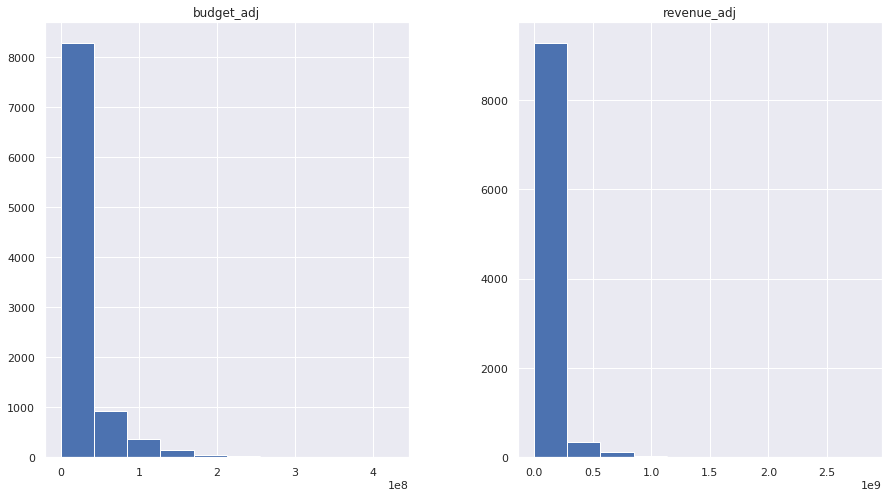

In [21]:
# Review dataset on histograms
df_m.hist(figsize=(15,8));

<a id='eda'></a>
## Exploratory Data Analysis

### Which are the best 5 first directors of the movies?

* **1.1 Which are the best 5 first directors by movie quantity and total adjusted revenue?**

In [22]:
#Create additional column for first director
df_m['first_director'] = df_m['director'].map(lambda v: v.split('|')[0])
df_m.head()

,imdb_id,original_title,director,genres,production_companies,release_date,budget_adj,revenue_adj,first_director
0,tt0369610,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,1.379999e+08,1.392446e+09,Colin Trevorrow
1,tt1392190,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,1.379999e+08,3.481613e+08,George Miller
2,tt2908446,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,1.012000e+08,2.716190e+08,Robert Schwentke
3,tt2488496,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,1.839999e+08,1.902723e+09,J.J. Abrams
4,tt2820852,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,1.747999e+08,1.385749e+09,James Wan


>In the analysis we will use the first director from the director column. We will assume that it is the main first director of the movie. 

In [23]:
#Check the type of new column
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9804 entries, 0 to 10865
Data columns (total 9 columns):
imdb_id                 9804 non-null object
original_title          9804 non-null object
director                9804 non-null object
genres                  9804 non-null object
production_companies    9804 non-null object
release_date            9804 non-null object
budget_adj              9804 non-null float64
revenue_adj             9804 non-null float64
first_director          9804 non-null object
dtypes: float64(2), object(7)
memory usage: 765.9+ KB


In [24]:
#Review the count of films for each first director
df_m.first_director.value_counts()

Woody Allen            43
Clint Eastwood         34
Steven Spielberg       29
Martin Scorsese        27
Ridley Scott           23
Ron Howard             22
Steven Soderbergh      22
Joel Schumacher        21
Brian De Palma         20
Tim Burton             19
Barry Levinson         19
John Carpenter         19
Wes Craven             19
Mike Nichols           18
Walter Hill            18
David Cronenberg       18
Rob Reiner             17
Sidney Lumet           17
Oliver Stone           17
Peter Hyams            17
Robert Rodriguez       17
Norman Jewison         17
Renny Harlin           17
Robert Zemeckis        17
Roman Polanski         16
Stephen Frears         16
Spike Lee              16
Tony Scott             16
Stephen Herek          16
John Landis            16
                       ..
Paul Morrissey          1
Hype Williams           1
Luca Bercovici          1
Eric Bress              1
Pieter Jan Brugge       1
Karzan Kader            1
Oliver Irving           1
Pradeep Sark

>It shows that Woody Allen, Clint Eastwood, Steven Spielberg, Martin Scorsese and Ridley Scott have directed the production of the largest number of movies as the first director.

In [25]:
#Format with commas and round off to two decimal places in pandas 
pd.options.display.float_format = '{:,.2f}'.format

#create table with totals and average revenue
top_director = df_m.groupby('first_director').revenue_adj.agg(['count', 'sum'])
top_director['average revenue'] = top_director['sum'] / top_director['count']
df_new = top_director.sort_values(by=['sum'], ascending=False).head(5)

#convert dictionary to a dataframe
df_fd = pd.DataFrame(df_new)
df_fd.index.name = 'first_director'
df_fd.reset_index(inplace=True)
df_fd.rename(columns={'first_director': 'First director', 'count': 'Number of movies', 'sum': 'Total revenue adj.', 'average revenue': 'Average Revenue adj.'}).head()

,First director,Number of movies,Total revenue adj.,Average Revenue adj.
0,Steven Spielberg,29,"15,316,180,539.05","528,144,156.52"
1,James Cameron,10,"7,440,954,610.82","744,095,461.08"
2,Peter Jackson,13,"7,133,581,568.91","548,737,043.76"
3,George Lucas,6,"6,313,919,162.63","1,052,319,860.44"
4,Robert Zemeckis,17,"5,769,382,001.75","339,375,411.87"


> We will select the 5 top directors based on total adjusted revenue and when analize by number of films and average revenue.

In [26]:
#Create the new list of top 5 directors
d_list=df_fd.first_director
d_list.head()

0    Steven Spielberg
1       James Cameron
2       Peter Jackson
3        George Lucas
4     Robert Zemeckis
Name: first_director, dtype: object

In [27]:
#Check the version of seaborn as line plot is not available in 0.8 version
print(sns.__version__)

0.9.0


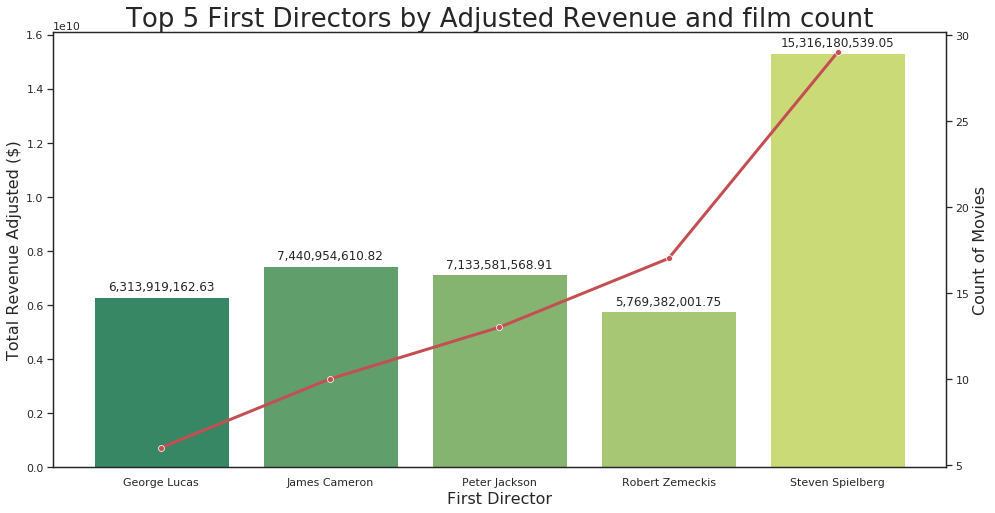

In [28]:
#Create combo chart
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(16,8))

#specify we want to share the same x-axis
ax2 = ax1.twinx()

#bar plot creation
sorted_df = df_fd.sort_values(by='first_director', ascending=True)
bar_plot = sns.barplot(data=sorted_df, x='first_director', y='sum', palette='summer', ax=ax1)
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(),',.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#line plot creation
p1 = sns.lineplot(data=sorted_df, x='first_director', y='count', color='r', markers=True, marker="o", ax=ax2, legend='full')
ax2.text

#set title
ax2.set_title('Top 5 First Directors by Adjusted Revenue and film count', fontsize = 26)

#set axis label 
ax1.set_ylabel('Total Revenue Adjusted ($)', fontsize=16)
ax2.set_ylabel('Count of Movies', fontsize=16)
ax1.set_xlabel('First Director', fontsize=16)
plt.show()

> From the combinated plot we can see that the Steven Spielber directed films which total adjusted revenue are the highest, but as well he had the large number of films directed.

* **1.2 Which are the best 5 directors by revenue?**

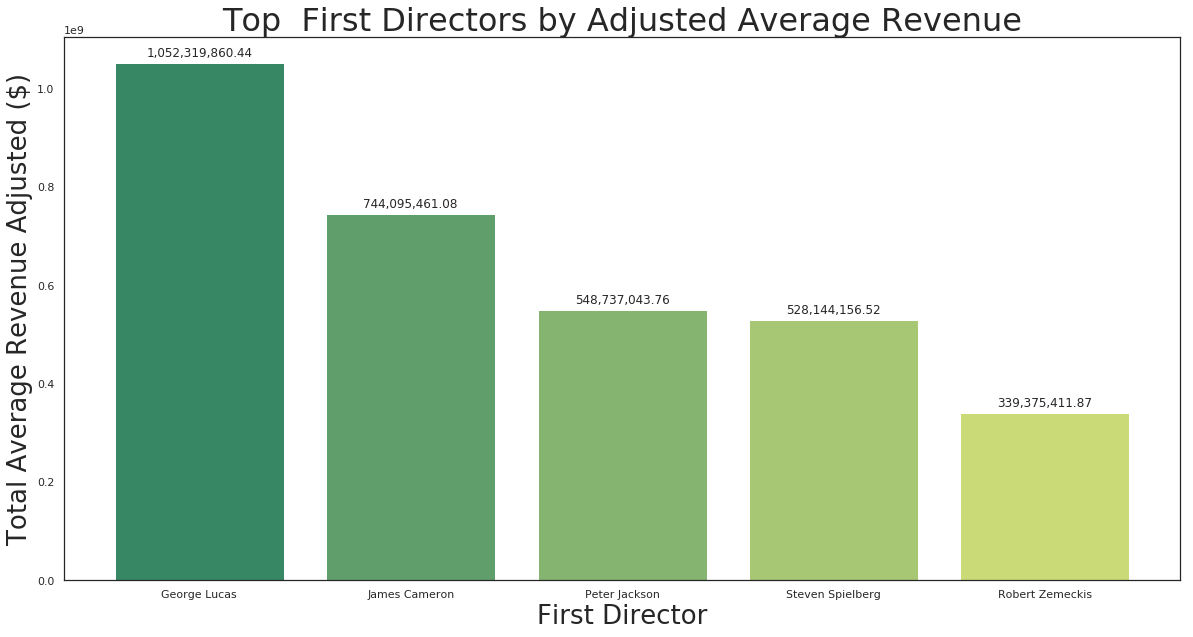

In [47]:
#Use bar plot for total revenue for each directors
sns.set(style="white", rc={"lines.linewidth": 3})
bar_dr = sns.barplot(data=df_fd.sort_values(by='average revenue', ascending=False), x='first_director', y='average revenue', palette='summer')
for d in bar_dr.patches:
    bar_dr.annotate(format(d.get_height(),',.2f'), (d.get_x() + d.get_width() / 2., d.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#Set bar size
bar_dr.plot(figsize=[20,10])

#set axis label and bar title
plt.xlabel('First Director', fontsize = 26)
plt.ylabel('Total Average Revenue Adjusted ($)', fontsize = 26)
plt.title('Top  First Directors by Adjusted Average Revenue', fontsize = 32)
plt.show()

>Based on the average one film revenue, George Lucas' directed films generated the highest average adjusted revenue from the selected list. We can make the conclusion that he is the best choice for filmmakers.

### 2. Which are the best 10 main movie production companies?

* **2.1 Which are the best 10 main movie production companies by adjusted profit?**

In [30]:
#First, create new column for the profit adjustedb
df_m['profit_adj'] = df_m['revenue_adj'] - df_m['budget_adj']
df_m.head(10)

,imdb_id,original_title,director,genres,production_companies,release_date,budget_adj,revenue_adj,first_director,profit_adj
0,tt0369610,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,"137,999,939.28","1,392,445,892.52",Colin Trevorrow,"1,254,445,953.24"
1,tt1392190,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,"137,999,939.28","348,161,292.49",George Miller,"210,161,353.21"
2,tt2908446,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,"101,199,955.47","271,619,025.41",Robert Schwentke,"170,419,069.94"
3,tt2488496,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,"183,999,919.04","1,902,723,129.80",J.J. Abrams,"1,718,723,210.76"
4,tt2820852,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,"174,799,923.09","1,385,748,801.47",James Wan,"1,210,948,878.38"
5,tt1663202,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,"124,199,945.35","490,314,247.02",Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"366,114,301.67"
6,tt1340138,Terminator Genisys,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,"142,599,937.26","405,355,075.68",Alan Taylor,"262,755,138.43"
7,tt3659388,The Martian,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,"99,359,956.28","547,749,654.31",Ridley Scott,"448,389,698.03"
8,tt2293640,Minions,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,"68,079,970.04","1,064,192,016.80",Kyle Balda,"996,112,046.75"
9,tt2096673,Inside Out,Pete Docter,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,"160,999,929.16","785,411,574.70",Pete Docter,"624,411,645.54"


In [31]:
#Create a new column with the main production company
df_m['main_production_company'] = df_m['production_companies'].map(lambda v: v.split('|')[0])
df_m.head()

,imdb_id,original_title,director,genres,production_companies,release_date,budget_adj,revenue_adj,first_director,profit_adj,main_production_company
0,tt0369610,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,"137,999,939.28","1,392,445,892.52",Colin Trevorrow,"1,254,445,953.24",Universal Studios
1,tt1392190,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,"137,999,939.28","348,161,292.49",George Miller,"210,161,353.21",Village Roadshow Pictures
2,tt2908446,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,"101,199,955.47","271,619,025.41",Robert Schwentke,"170,419,069.94",Summit Entertainment
3,tt2488496,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,"183,999,919.04","1,902,723,129.80",J.J. Abrams,"1,718,723,210.76",Lucasfilm
4,tt2820852,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,"174,799,923.09","1,385,748,801.47",James Wan,"1,210,948,878.38",Universal Pictures


>In the analysis we will use the first production company from the production_companies column. We will assume that it is the main production company of the movie.

In [32]:
#Count the total films base on main production companies
df_m.main_production_company.value_counts()

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
New Line Cinema                           206
Warner Bros.                              172
Miramax Films                             132
TriStar Pictures                          121
Columbia Pictures Corporation             119
Metro-Goldwyn-Mayer (MGM)                 104
20th Century Fox                           88
Village Roadshow Pictures                  79
DreamWorks SKG                             73
United Artists                             73
Touchstone Pictures                        72
Orion Pictures                             70
BBC Films                                  69
Fox Searchlight Pictures                   68
Lions Gate Films                           52
Summit Entertainment                       46
Regency Enterprises               

>We can see that Universal Pictures, Paramount Pictures, Columbia Pictures, Twentieth Century Fox Film Corporation and Ridley Scott have created the largest number of movies as the main production company.

In [33]:
#Format with commas and round off to two decimal places in pandas 
pd.options.display.float_format = '{:,.2f}'.format

#create the table of adjusted profit totals and film counts
top_production_companies = df_m.groupby('main_production_company').profit_adj.agg(['count', 'sum'])
top_production_companies['average profit'] = top_production_companies['sum'] / top_production_companies['count']
df_pc = top_production_companies.sort_values(by=['sum'], ascending=False).head(10)

#convert dictionary to a dataframe
df_pc = pd.DataFrame(df_pc)
df_pc.index.name = 'main_production_company'
df_pc.reset_index(inplace=True)
df_pc.rename(columns={'main_production_company': 'Main production company', 'count': 'Number of movies', 'sum': 'Total profit adj.', 'average profit': 'Average profit adj.'}).head(10)

,Main production company,Number of movies,Total profit adj.,Average profit adj.
0,Universal Pictures,460,"43,117,347,569.66","93,733,364.28"
1,Paramount Pictures,426,"41,383,031,529.47","97,143,266.50"
2,Walt Disney Pictures,213,"28,657,731,689.39","134,543,341.26"
3,Twentieth Century Fox Film Corporation,242,"25,182,694,238.38","104,060,719.99"
4,Columbia Pictures,271,"22,848,714,477.42","84,312,599.55"
5,Warner Bros.,172,"15,193,942,473.14","88,336,874.84"
6,Lucasfilm,21,"13,262,973,223.68","631,570,153.51"
7,New Line Cinema,206,"12,088,527,493.36","58,682,172.30"
8,Eon Productions,21,"10,056,751,397.44","478,892,923.69"
9,Columbia Pictures Corporation,119,"9,438,413,827.12","79,314,401.91"


Text(0.5,1,'Top 10 Main Production Companies by Adjusted Profit')

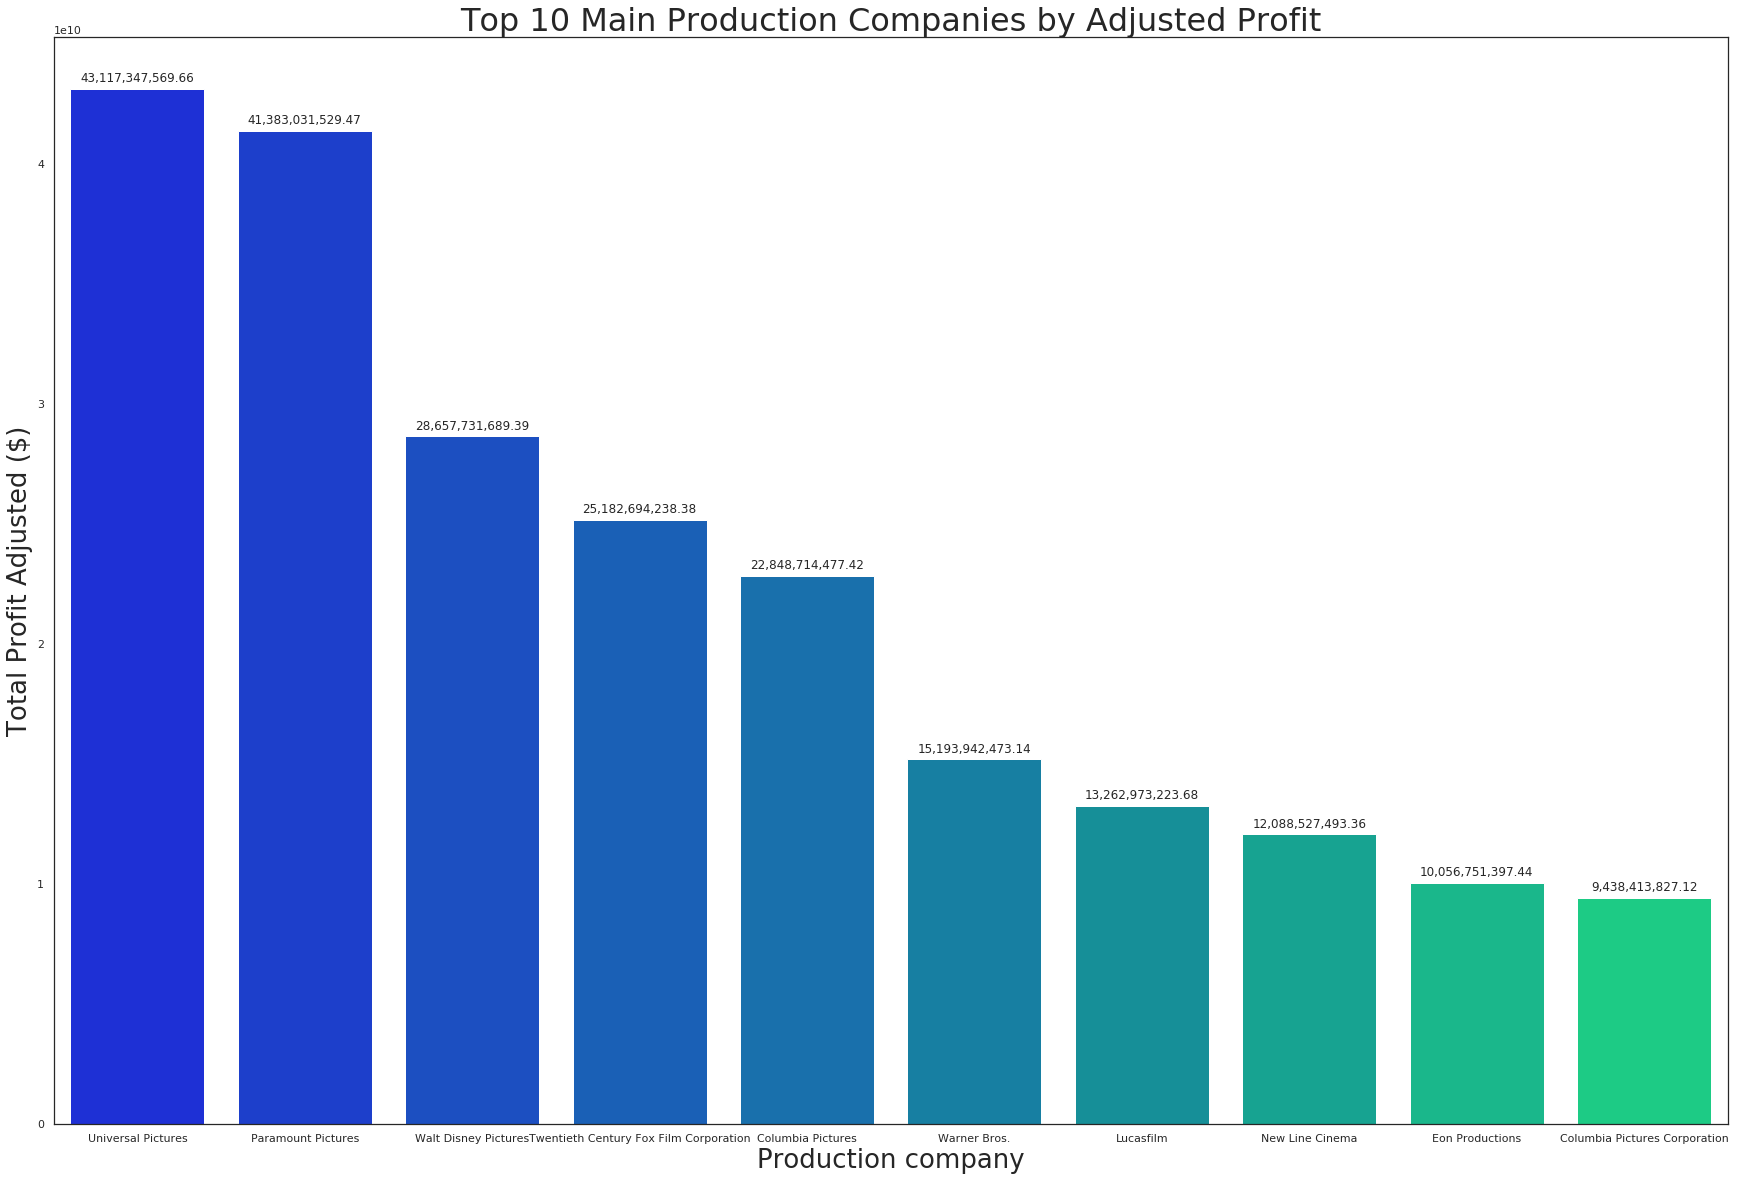

In [34]:
#Add plot size and style
plt.figure(figsize=[30,20])
sns.set(style="white", rc={"lines.linewidth": 3})

#bar plot creation
bar_plot_pc = sns.barplot(data=df_pc.sort_values(by='sum', ascending=False), x='main_production_company', y='sum', palette='winter')
for r in bar_plot_pc.patches:
    bar_plot_pc.annotate(format(r.get_height(),',.2f'), (r.get_x() + r.get_width() / 2., r.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#add bar title and axis labels
plt.xlabel('Production company', fontsize = 26)
plt.ylabel('Total Profit Adjusted ($)', fontsize = 26)
plt.title('Top 10 Main Production Companies by Adjusted Profit', fontsize = 32)

>From the above, Universal Pictures generated the highest total adjusted profit as a main production company.

* **2.2 Which are the best 10 main production companies by average adjusted profit?**

In [35]:
#Create table with the top 10 production companies sorted by average profit
ave_pc = df_pc.sort_values(by=['average profit',], ascending=False).head(10)
ave_pc.rename(columns={'main_production_company': 'Main production company', 'count': 'Number of movies', 'sum': 'Total profit adj', 'average profit': 'Average profit adj'}).head(10)

,Main production company,Number of movies,Total profit adj,Average profit adj
6,Lucasfilm,21,"13,262,973,223.68","631,570,153.51"
8,Eon Productions,21,"10,056,751,397.44","478,892,923.69"
2,Walt Disney Pictures,213,"28,657,731,689.39","134,543,341.26"
3,Twentieth Century Fox Film Corporation,242,"25,182,694,238.38","104,060,719.99"
1,Paramount Pictures,426,"41,383,031,529.47","97,143,266.50"
0,Universal Pictures,460,"43,117,347,569.66","93,733,364.28"
5,Warner Bros.,172,"15,193,942,473.14","88,336,874.84"
4,Columbia Pictures,271,"22,848,714,477.42","84,312,599.55"
9,Columbia Pictures Corporation,119,"9,438,413,827.12","79,314,401.91"
7,New Line Cinema,206,"12,088,527,493.36","58,682,172.30"


Text(0.5,1,'Top 10 Main Production Companies by Adjusted Average Profit')

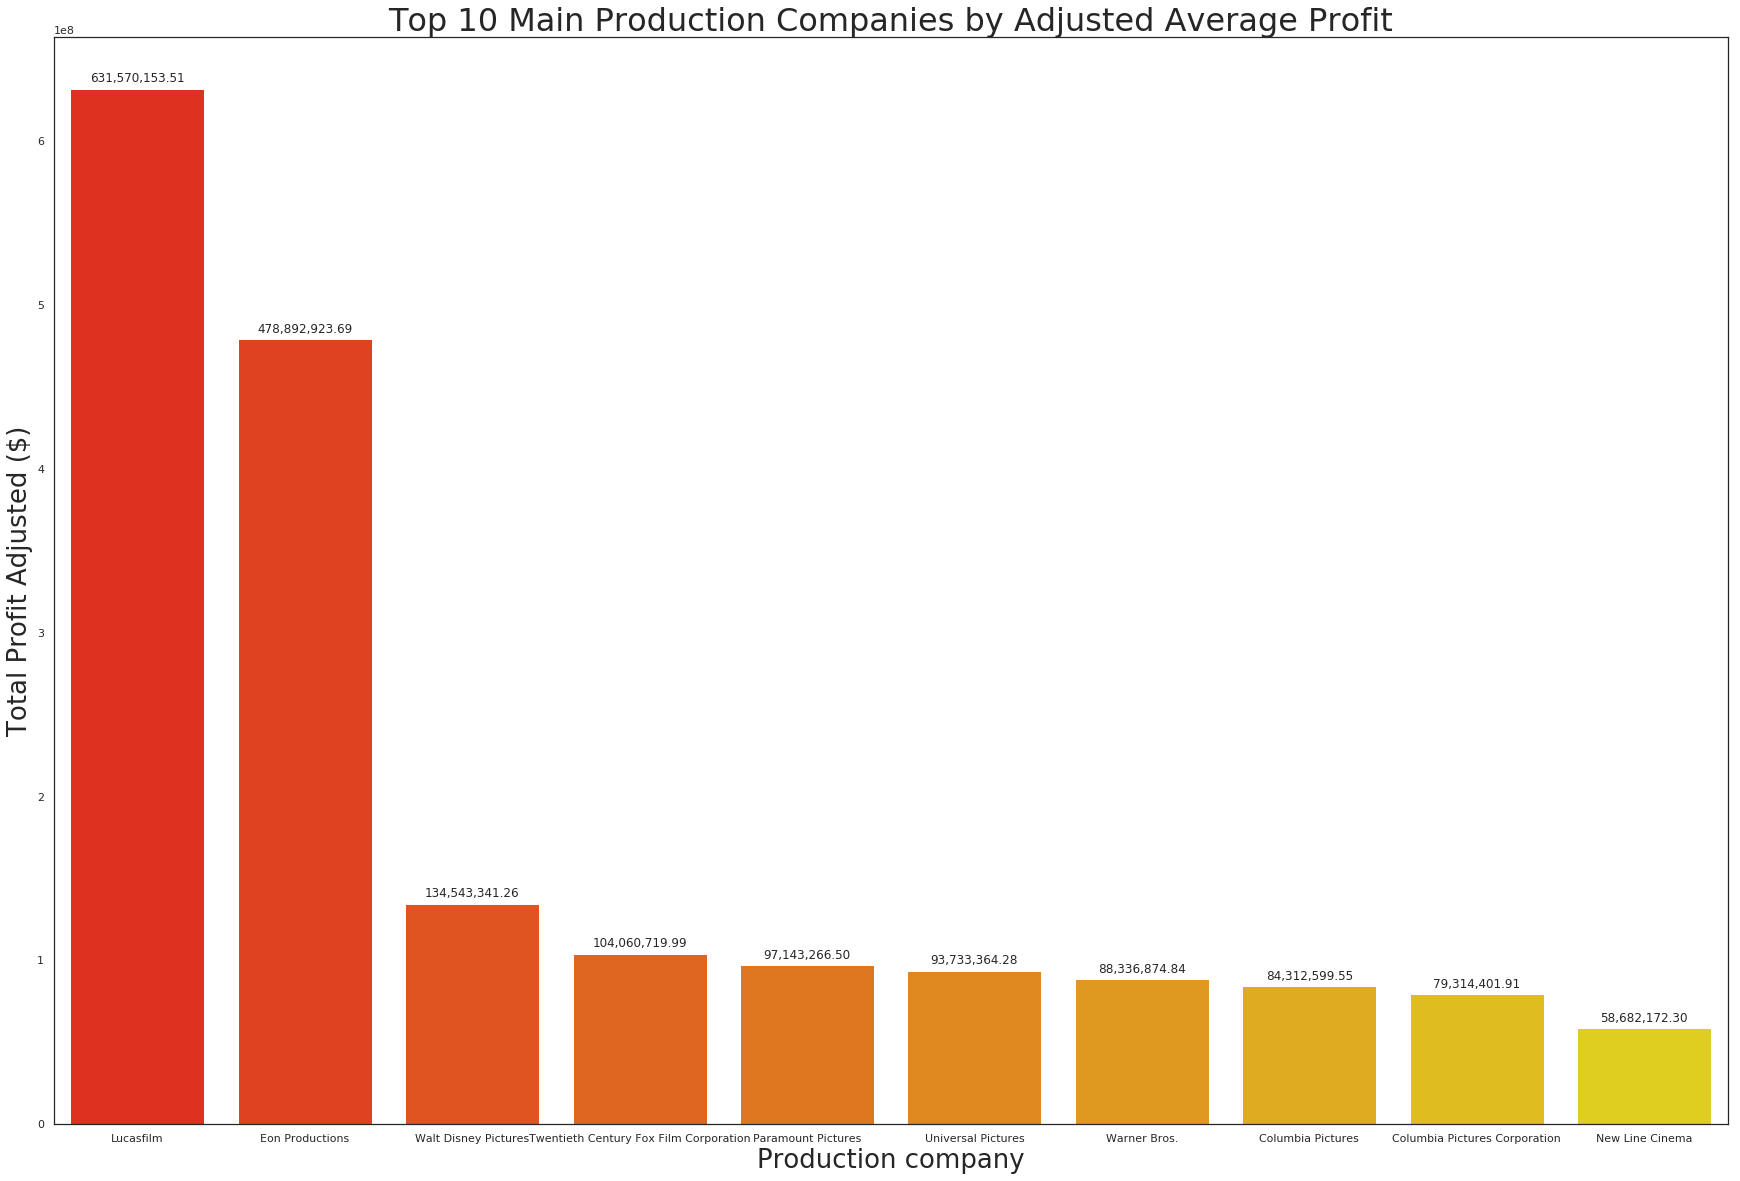

In [36]:
#Add bar size and style
plt.figure(figsize=[30,20])
sns.set(style="white", rc={"lines.linewidth": 3})

#bar plot creation
bar_plot_ave_pc = sns.barplot(data=ave_pc.sort_values(by='average profit', ascending=False), x='main_production_company', y='average profit', palette='autumn')
for n in bar_plot_ave_pc.patches:
    bar_plot_ave_pc.annotate(format(n.get_height(),',.2f'), (n.get_x() + n.get_width() / 2., n.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#add bar title add axis labels
plt.xlabel('Production company', fontsize = 26)
plt.ylabel('Total Profit Adjusted ($)', fontsize = 26)
plt.title('Top 10 Main Production Companies by Adjusted Average Profit', fontsize = 32)

>Based on the bar chart, we can conclude that Lucasfilm production company has the highest average adjusted profit and second goes Eon Productions company. Both companies have 21 movies created so it means that they quete small production companies which usually don't take many risks. Also the rest companies are bigger production companies and have similar average profit.

## 3. Which are the best 5 main movie genres?

* **3.1 Which are the best 5 main genres by adjusted profit?**

In [37]:
#Create a new column with the main genre
df_m['main_genre'] = df_m['genres'].map(lambda v: v.split('|')[0])
df_m.head()

,imdb_id,original_title,director,genres,production_companies,release_date,budget_adj,revenue_adj,first_director,profit_adj,main_production_company,main_genre
0,tt0369610,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,"137,999,939.28","1,392,445,892.52",Colin Trevorrow,"1,254,445,953.24",Universal Studios,Action
1,tt1392190,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,"137,999,939.28","348,161,292.49",George Miller,"210,161,353.21",Village Roadshow Pictures,Action
2,tt2908446,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,"101,199,955.47","271,619,025.41",Robert Schwentke,"170,419,069.94",Summit Entertainment,Adventure
3,tt2488496,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,"183,999,919.04","1,902,723,129.80",J.J. Abrams,"1,718,723,210.76",Lucasfilm,Action
4,tt2820852,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,"174,799,923.09","1,385,748,801.47",James Wan,"1,210,948,878.38",Universal Pictures,Action


>In the analysis we will use the first genre from the director column and will assume that it is the main genre of the movie. 

In [38]:
#Format with commas and round off to two decimal places in pandas 
pd.options.display.float_format = '{:,.2f}'.format

#crete the table with total and average adjusted profit and count of films
top_genres = df_m.groupby('main_genre').profit_adj.agg(['count', 'sum'])
top_genres['average profit'] = top_genres['sum'] / top_genres['count']
df_genres = top_genres.sort_values(by=['sum'], ascending=False).head(5)

#convert dictionary to a dataframe
df_genres = pd.DataFrame(df_genres)
df_genres.index.name = 'Main genre'
df_genres.reset_index(inplace=True)
df_genres.rename(columns={'count': 'Number of movies', 'sum': 'Total profit adj', 'average profit': 'Average profit adj'}, inplace=True)
df_genres.head(5)

,Main genre,Number of movies,Total profit adj,Average profit adj
0,Comedy,2084,"99,494,241,336.05","47,741,958.41"
1,Drama,2225,"97,635,992,281.48","43,881,344.85"
2,Action,1478,"97,233,615,238.95","65,787,290.42"
3,Adventure,551,"77,060,306,703.20","139,855,366.07"
4,Horror,853,"37,842,697,362.14","44,364,240.75"


>We select the 5 top genres based on total adjusted profit and when analize by average adjusted profit.

Text(0.5,1,'Top 5 Most Profitable Main Genres by Total Adjusted Profit')

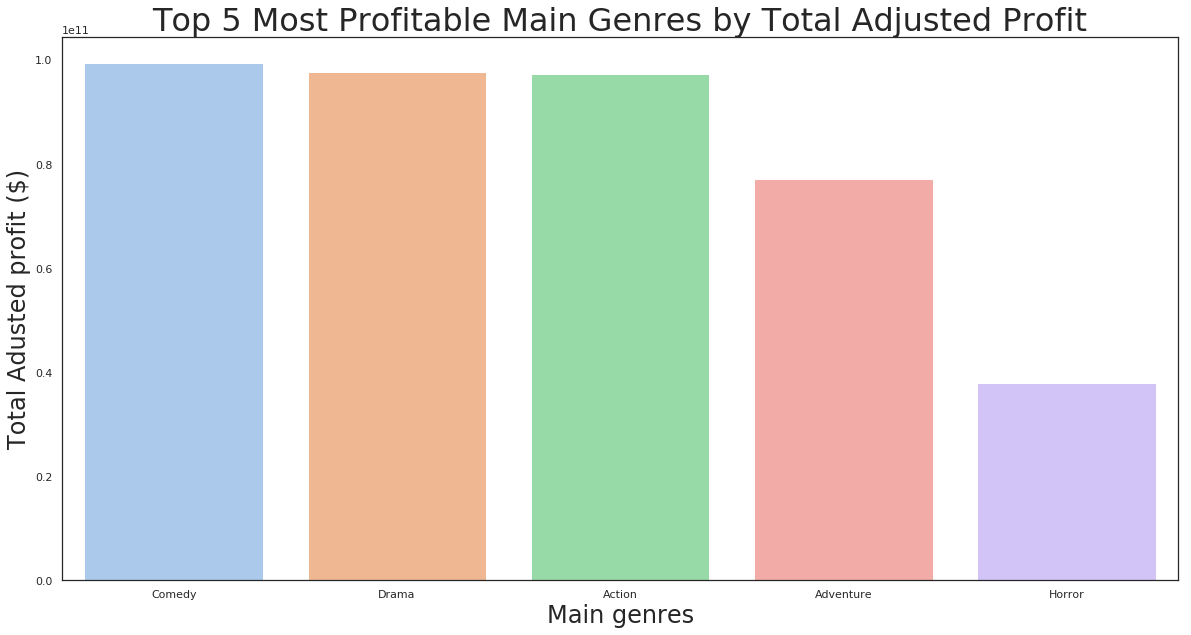

In [39]:
# Set the size
plt.figure(figsize=[20,10])

# Use bar plot Genres by count of occurance
sns.barplot(data=df_genres.sort_values(by='Total profit adj', ascending=False), x='Main genre', y='Total profit adj', palette='pastel')

#set title and axis labels
plt.xlabel('Main genres', fontsize = 24)
plt.ylabel('Total Adusted profit ($)', fontsize = 24)
plt.title('Top 5 Most Profitable Main Genres by Total Adjusted Profit', fontsize = 32)

>The bar plot shows that Comedy, Drama, Action, Adventure and Horror are most profitable main genres.

Text(0.5,1,'Top 5 Production Companies by Adjusted Average Profit')

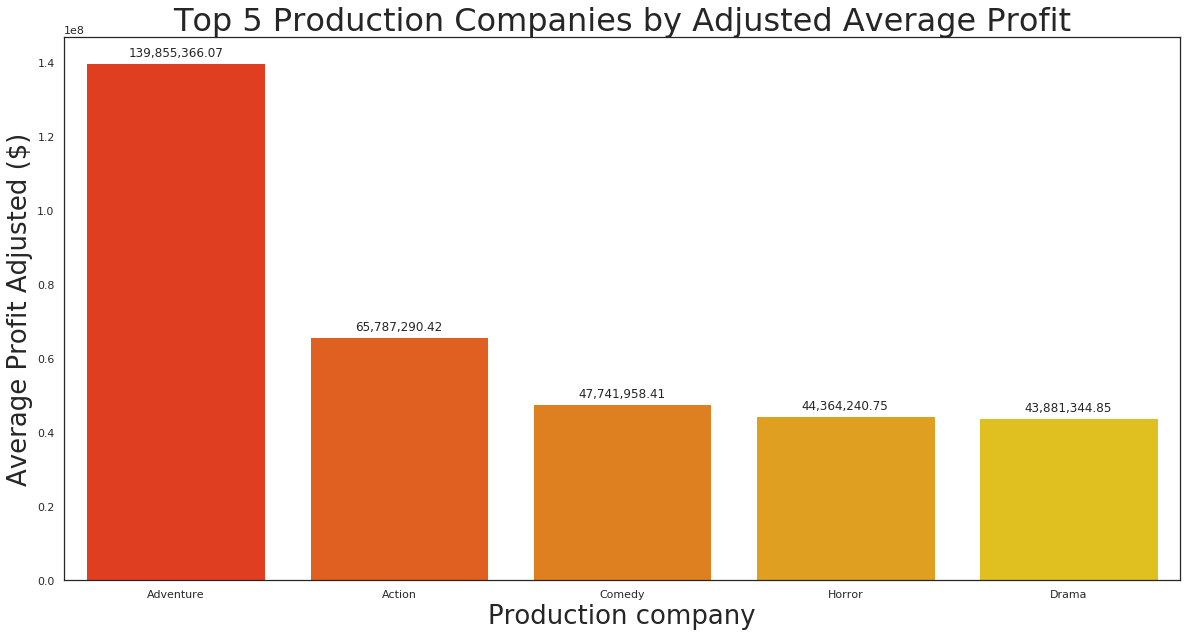

In [40]:
#Add bar size
plt.figure(figsize=[20,10])

#bar plot creation
bar_plot_ave_gn = sns.barplot(data=df_genres.sort_values(by='Average profit adj', ascending=False), x='Main genre', y='Average profit adj', palette='autumn')
for m in bar_plot_ave_gn.patches:
    bar_plot_ave_gn.annotate(format(m.get_height(),',.2f'), (m.get_x() + m.get_width() / 2., m.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#add bar title add axis labels
plt.xlabel('Production company', fontsize = 26)
plt.ylabel('Average Profit Adjusted ($)', fontsize = 26)
plt.title('Top 5 Production Companies by Adjusted Average Profit', fontsize = 32)

>Based on the bars we can make conclusions that Adventure films are the most profitable genre by average adjusted profit.

### 4. What is a good movie budget based on adjusted profit ?


In [41]:
#Review the main figures of adjusted budget and profit
df_m.describe()

,budget_adj,revenue_adj,profit_adj
count,"9,804.00","9,804.00","9,804.00"
mean,"28,781,246.49","86,170,370.57","57,389,124.08"
std,"31,587,302.10","142,644,467.45","126,459,669.09"
min,0.92,2.37,"-413,912,431.00"
25%,"19,354,643.02","49,527,344.67","16,181,852.56"
50%,"19,354,643.02","56,866,876.22","37,512,233.20"
75%,"24,408,279.26","56,866,876.22","46,032,807.97"
max,"425,000,000.00","2,827,123,750.41","2,750,136,650.92"


Text(0,0.5,'Adusted Budget ($)')

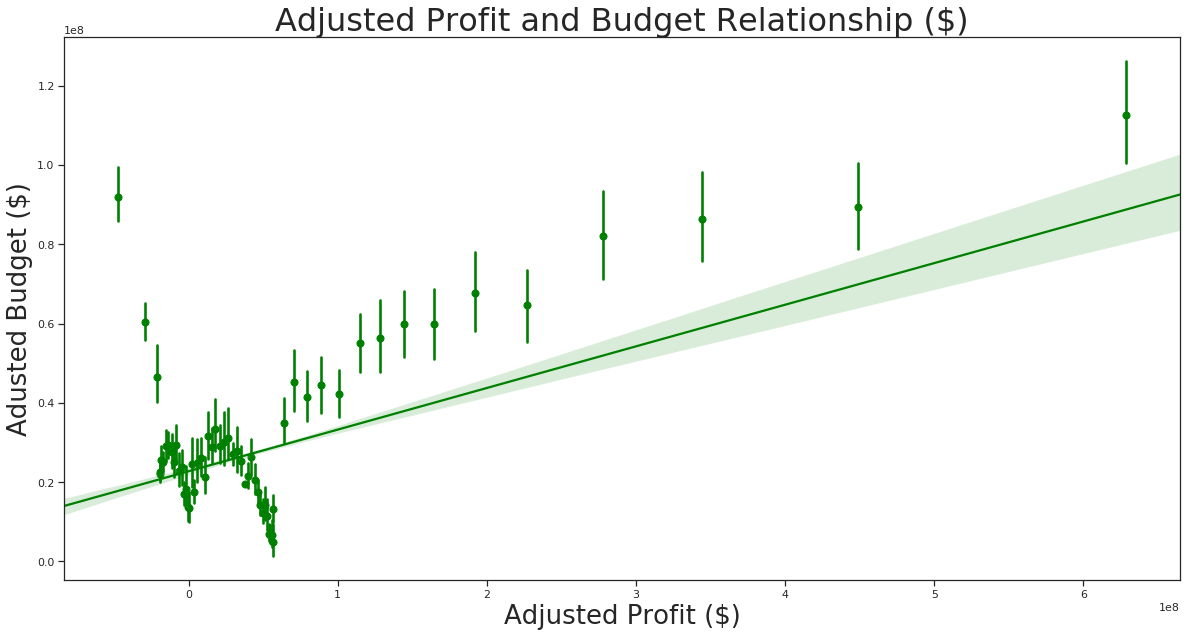

In [48]:
#Add plot style
sns.set(style="ticks")

#Create scatter plot of profit adj and budget columns
sns.regplot(x='profit_adj', y='budget_adj', data=df_m, x_bins=100, color='green')

#add figure size
sns.set(rc={'figure.figsize':(20,10)})

#add title and the labels to the scatter plot
plt.title("Adjusted Profit and Budget Relationship ($)",fontsize = 32)
plt.xlabel("Adjusted Profit ($)",fontsize = 26)
plt.ylabel("Adusted Budget ($)",fontsize = 26)

>From the scatter plot, it can be concluded that there is a positive relationship between adjusted profit and adjusted budget. We can make the conclusion that the budget does need to be high to have big profit from the movie. The best budget for creating a movie is between 20,000,0000 to 30,000,000 dollars.

### 6. Which months were most profitable to release the movies?

In [43]:
#Create a new column with the main genre
df_m['release_month'] = df_m['release_date'].map(lambda v: v.split('/')[0])
df_m.head()

,imdb_id,original_title,director,genres,production_companies,release_date,budget_adj,revenue_adj,first_director,profit_adj,main_production_company,main_genre,release_month
0,tt0369610,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,"137,999,939.28","1,392,445,892.52",Colin Trevorrow,"1,254,445,953.24",Universal Studios,Action,6
1,tt1392190,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,"137,999,939.28","348,161,292.49",George Miller,"210,161,353.21",Village Roadshow Pictures,Action,5
2,tt2908446,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,"101,199,955.47","271,619,025.41",Robert Schwentke,"170,419,069.94",Summit Entertainment,Adventure,3
3,tt2488496,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,"183,999,919.04","1,902,723,129.80",J.J. Abrams,"1,718,723,210.76",Lucasfilm,Action,12
4,tt2820852,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,"174,799,923.09","1,385,748,801.47",James Wan,"1,210,948,878.38",Universal Pictures,Action,4


>We created the additional colum with month numbers and we will prepare the table with total adjusted profit and average adjusted profit by the months.

In [44]:
#Format with commas and round off to two decimal places in pandas 
pd.options.display.float_format = '{:,.2f}'.format

#create the table of adjusted profit totals and film counts
df_monthly_profit_ave = df_m.groupby('release_month').profit_adj.agg(['sum', 'mean'])
df_mpa = df_monthly_profit_ave
df_mpa = df_mpa.sort_values(by=['mean'], ascending=False).head(12)

#convert dictionary to a dataframe
df_mpa = pd.DataFrame(df_mpa)
df_mpa.index.name = 'realease_months'
df_mpa.reset_index(inplace=True)
df_mpa['realease_months'].replace({'1': 'Jan', '2': 'Feb', '3':'Mar', '4':'Apr','5': 'May', '6': 'Jun', '7':'Jul', '8':'Aug','9': 'Sep', '10': 'Oct', '11':'Nov', '12':'Dec'}, inplace=True)
df_mpa.rename(columns={'realease_months': 'Realease month', 'sum': 'Total profit adj.', 'mean': 'Average profit adj.'}).head(12)

,Realease month,Total profit adj.,Average profit adj.
0,Jun,"72,019,592,205.27","93,653,565.94"
1,Dec,"74,762,185,937.77","83,254,104.61"
2,May,"58,034,134,347.79","78,213,119.07"
3,Jul,"53,546,293,451.40","74,681,022.94"
4,Nov,"54,703,583,585.05","73,823,999.44"
5,Mar,"41,264,970,928.26","55,688,219.88"
6,Apr,"34,519,611,514.76","47,613,257.26"
7,Oct,"45,848,822,812.28","44,127,837.16"
8,Aug,"35,225,263,395.37","41,637,427.18"
9,Feb,"24,713,176,867.34","39,352,192.46"


Text(0.5,1,'Average Profit Adjusted by month (1960 - 2015)')

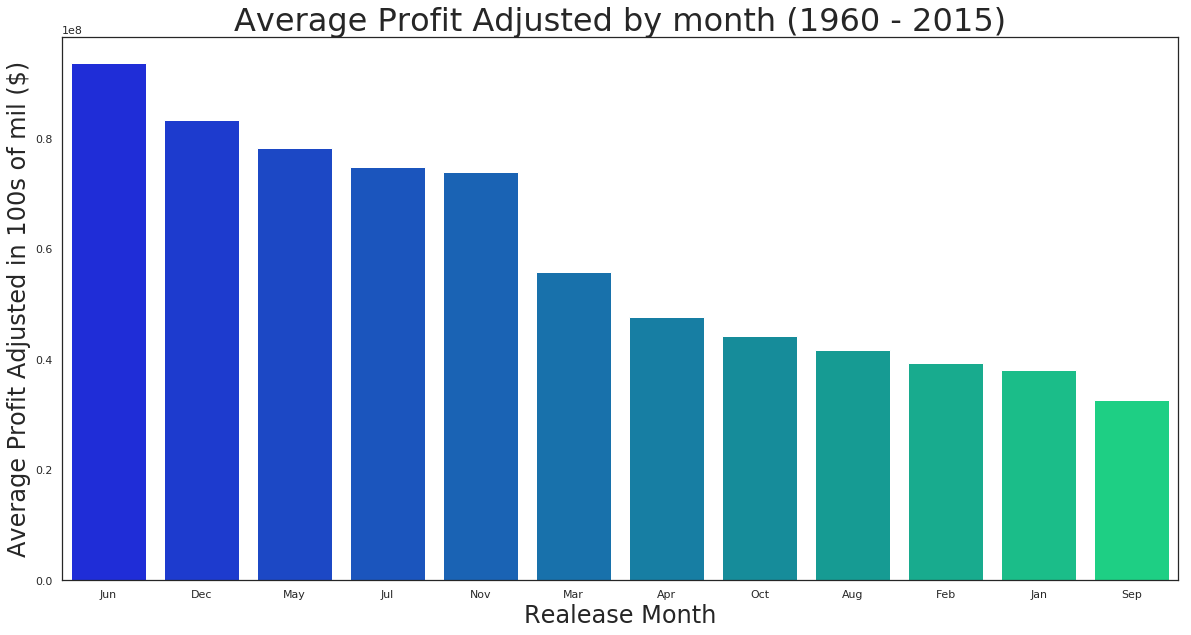

In [45]:
#Add bar size
plt.figure(figsize=[20,10])
sns.set(style="white", rc={"lines.linewidth": 3})

#bar plot creation
sns.barplot(data=df_mpa.sort_values(by='mean', ascending=False), x='realease_months', y='mean', palette='winter')
plt.xlabel('Realease Month', fontsize = 24)
plt.ylabel('Average Profit Adjusted in 100s of mil ($)', fontsize = 24)
plt.title('Average Profit Adjusted by month (1960 - 2015)', fontsize = 32)


>From this chart, we can see that June, December and May are the best time to release movies as these months generate the highest profits.

<a id='conclusions'></a>
## Conclusions

Data analysis was prepared base on the TMDb movie dataset which was collected between 1960 to 2015. At the beginning the data was reviewed and some columns were dropped from analysis. Deleted duplicates and null values. Changed data types and 0 values were changed to the mean values to get more accurate results.

**In this project we analyzed a data set from a filmmaker prospective and tried to answer the main questions related to how to create a successful profitable movie. After this analysis we can conclude following:**


1. **Top 5 Best First Directors** based on total and average adjusted revenue  are: George Lucas, James Camern, Peter Jackson, Steven Spielberg and Robert Zemeckis.
2. **Top 10 Best Main Production Companies** based on total and average adjusted profit: Lucasfilm, Eon Productions, Walt Disney Pictures, Twentieth Century Fox Film Corporation, Paramount Pictures, Universal Pictures, Warner Bros, Columbia Pictures, Columbia Pictures Corporation and New Line Cinema.
3. **Top 5 Best Main Genres** based on total and average adjusted profit: Adventure, Action, Comedy, Horror and Drama.
4. **Best Budget for good profit** are 20,000,000 to 30,000,000 dollars.
5. **Best months to release movies** based on average adjusted profit  are June, December, May, July and November.

## Sources
Python for Data Analysis - Wes McKinney - 2012;
Jupyter Notebooks https://jupyter.org/
Pandas Documentation https://pandas.pydata.org/
Kaggle guide https://www.kaggle.com/learn/pandas 
And below links:
https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/,
https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0,
https://honingds.com/blog/seaborn-scatterplot/.

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0